In [2]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_palette('colorblind'); sns.set_color_codes()

In [3]:
# 3E starting code

def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

p_grid, posterior = posterior_grid_approx(grid_points=1000, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

In [53]:
# 3E1
sum( samples < 0.2 ) / 1e4

0.001

In [54]:
# 3E2
sum( samples > 0.8) / 1e4

0.1209

In [55]:
# 3E3
sum( (samples > 0.2) & (samples < 0.8)) / 1e4

0.8781

In [56]:
# 3E4
# See page 55
np.percentile(samples, 20)

0.5155155155155156

In [57]:
# 3E5
np.percentile(samples, 80)

0.7597597597597597

In [58]:
# 3E6
pm.hpd(samples, alpha=0.66)

array([0.5995996 , 0.72672673])

In [64]:
# 3E7
np.percentile(samples, [17, 83])

array([0.4984985 , 0.77294294])

In [17]:
# 3M1
p_grid_1, posterior_1 = posterior_grid_approx(grid_points=1000, success=8, tosses=15)

In [18]:
# 3M2
samples_1 = np.random.choice(p_grid_1, p=posterior_1, size=int(1e4), replace=True)
pm.hpd(samples_1, alpha=0.1)


array([ 0.33433433,  0.72172172])

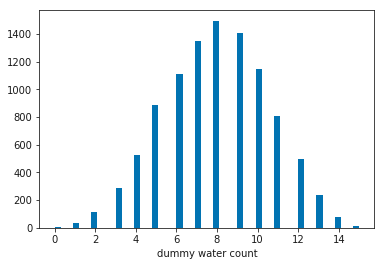

In [19]:
# 3M3
dummy_w = stats.binom.rvs(n=15, p=samples_1)
plt.hist(dummy_w, bins=50)
plt.xlabel('dummy water count');

In [20]:
sum( dummy_w == 8) / 1e4

0.14949999999999999

In [28]:
# 3M4
# execute this a few times, you'll see different values due to simulation variance
dummy_w = stats.binom.rvs(n=9, p=samples_1)
sum( dummy_w == 6) / 1e4

0.1731

In [4]:
# 3H1
# 0 is female
# 1 is male

birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
0,0,0,1,1,1,0,0,0,0])

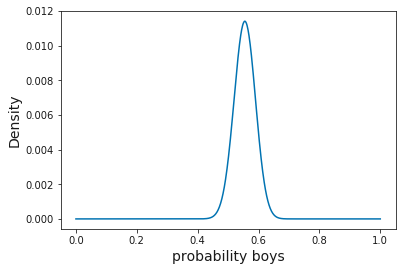

In [13]:
p_grid_3H1, posterior_3H1 = posterior_grid_approx(grid_points=1000, success=111, tosses=200)
plt.plot(p_grid_3H1, posterior_3H1)
plt.xlabel('probability boys', fontsize=14)
plt.ylabel('Density', fontsize=14);

In [8]:
max(posterior_3H1)

0.011405452547588308

In [10]:
p_grid_3H1[posterior_3H1 == max(posterior_3H1)]

array([ 0.55455455])

In [16]:
# 3H2
samples_3H1 = np.random.choice(p_grid_3H1, p=posterior_3H1, size=int(1e4), replace=True)
pm.hpd(samples_3H1, alpha=0.5)

array([ 0.53053053,  0.57757758])

In [18]:
pm.hpd(samples_3H1, alpha=0.11)

array([ 0.5005005 ,  0.61161161])

In [19]:
pm.hpd(samples_3H1, alpha=0.03)

array([ 0.47147147,  0.62262262])

In [25]:
# 3H3
dummy_boys = stats.binom.rvs(n=200, p=samples_3H1)
dummy_boys[2]

118

(array([   1.,    0.,    0.,    1.,    0.,    1.,    0.,    0.,    1.,
           0.,    0.,    2.,    4.,    0.,    3.,    3.,    7.,    5.,
           0.,    7.,   15.,   16.,    0.,   18.,   22.,   22.,   31.,
           0.,   47.,   46.,   59.,    0.,   78.,   96.,  118.,  147.,
           0.,  157.,  181.,  191.,    0.,  206.,  236.,  283.,  302.,
           0.,  320.,  316.,  354.,    0.,  406.,  383.,  363.,  405.,
           0.,  433.,  391.,  372.,  358.,    0.,  372.,  339.,  336.,
           0.,  298.,  270.,  277.,  262.,    0.,  217.,  197.,  180.,
           0.,  147.,  119.,   93.,  103.,    0.,   83.,   73.,   43.,
           0.,   41.,   36.,   28.,   22.,    0.,   19.,    7.,   12.,
           0.,    7.,    4.,    1.,    3.,    0.,    3.,    0.,    0.,    1.]),
 array([  68.  ,   68.78,   69.56,   70.34,   71.12,   71.9 ,   72.68,
          73.46,   74.24,   75.02,   75.8 ,   76.58,   77.36,   78.14,
          78.92,   79.7 ,   80.48,   81.26,   82.04,   82.82,   83.6

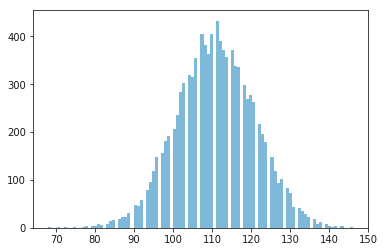

In [26]:
plt.hist(dummy_boys, bins=100, alpha=0.5)

(array([   1.,    0.,    0.,    1.,    3.,    2.,    0.,    1.,    2.,
           5.,    9.,   10.,   11.,    0.,   11.,   17.,   13.,   29.,
          27.,    0.,   31.,   43.,   58.,   58.,   55.,   81.,    0.,
          92.,  104.,  107.,  123.,  115.,  136.,    0.,  162.,  190.,
         196.,  218.,  217.,    0.,  266.,  259.,  276.,  298.,  292.,
         283.,    0.,  304.,  344.,  360.,  324.,  304.,  347.,    0.,
         327.,  357.,  262.,  309.,  259.,    0.,  267.,  239.,  252.,
         208.,  237.,  196.,    0.,  162.,  160.,  120.,  125.,   92.,
         118.,    0.,   92.,   87.,   54.,   56.,   43.,    0.,   44.,
          28.,   23.,   23.,   21.,   13.,    0.,    8.,    7.,    9.,
           6.,    2.,    2.,    0.,    1.,    2.,    0.,    0.,    2.,    2.]),
 array([  59.  ,   59.85,   60.7 ,   61.55,   62.4 ,   63.25,   64.1 ,
          64.95,   65.8 ,   66.65,   67.5 ,   68.35,   69.2 ,   70.05,
          70.9 ,   71.75,   72.6 ,   73.45,   74.3 ,   75.15,   76. 

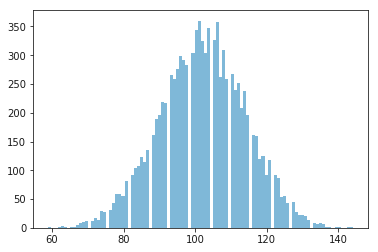

In [34]:
p_grid_birth1, posterior_birth1 = posterior_grid_approx(grid_points=1000, success=51, tosses=100)
samples_birth1 = np.random.choice(p_grid_birth1, p=posterior_birth1, size=int(1e4), replace=True)
dummy_birth1 = stats.binom.rvs(n=200, p=samples_birth1)
plt.hist(dummy_birth1, bins=100, alpha=0.5)

In [42]:
# 3H5

female_first_indices = np.where(birth1 == 0)
len(female_first_indices[0])

49

(array([   1.,    0.,    0.,    0.,    1.,    1.,    0.,    1.,    3.,
           0.,    1.,    0.,    3.,    2.,    4.,    4.,    3.,    9.,
           2.,   10.,    6.,    9.,    0.,   16.,   10.,   17.,   17.,
          18.,   21.,   33.,   33.,   38.,   55.,    0.,   55.,   66.,
          78.,   76.,   91.,   92.,  103.,  124.,  116.,  127.,    0.,
         157.,  159.,  163.,  177.,  195.,  221.,  216.,  235.,  243.,
         243.,    0.,  276.,  269.,  326.,  315.,  296.,  281.,  295.,
         288.,  289.,  280.,    0.,  316.,  325.,  300.,  280.,  293.,
         258.,  233.,  240.,  193.,  184.,    0.,  166.,  176.,  144.,
         123.,  105.,   93.,   95.,   78.,   64.,   51.,    0.,   24.,
          19.,   22.,   12.,   10.,   11.,    6.,    4.,    0.,    4.,    1.]),
 array([ 101.  ,  101.91,  102.82,  103.73,  104.64,  105.55,  106.46,
         107.37,  108.28,  109.19,  110.1 ,  111.01,  111.92,  112.83,
         113.74,  114.65,  115.56,  116.47,  117.38,  118.29,  119.2

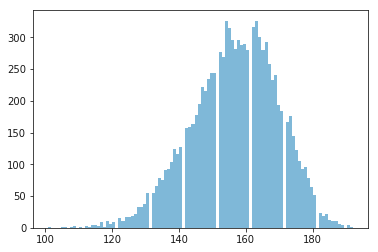

In [46]:

birth2[female_first_indices].sum()

p_grid_b_after_g, posterior_b_after_g = posterior_grid_approx(grid_points=1000, success=39, tosses=49)
samples_b_after_g = np.random.choice(p_grid_b_after_g, p=posterior_b_after_g, size=int(1e4), replace=True)
dummy_b_after_g = stats.binom.rvs(n=200, p=samples_b_after_g)
plt.hist(dummy_b_after_g, bins=100, alpha=0.5)
# where they get this data set...china?